In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('CVD_cleaned.csv', encoding='ISO-8859-1')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


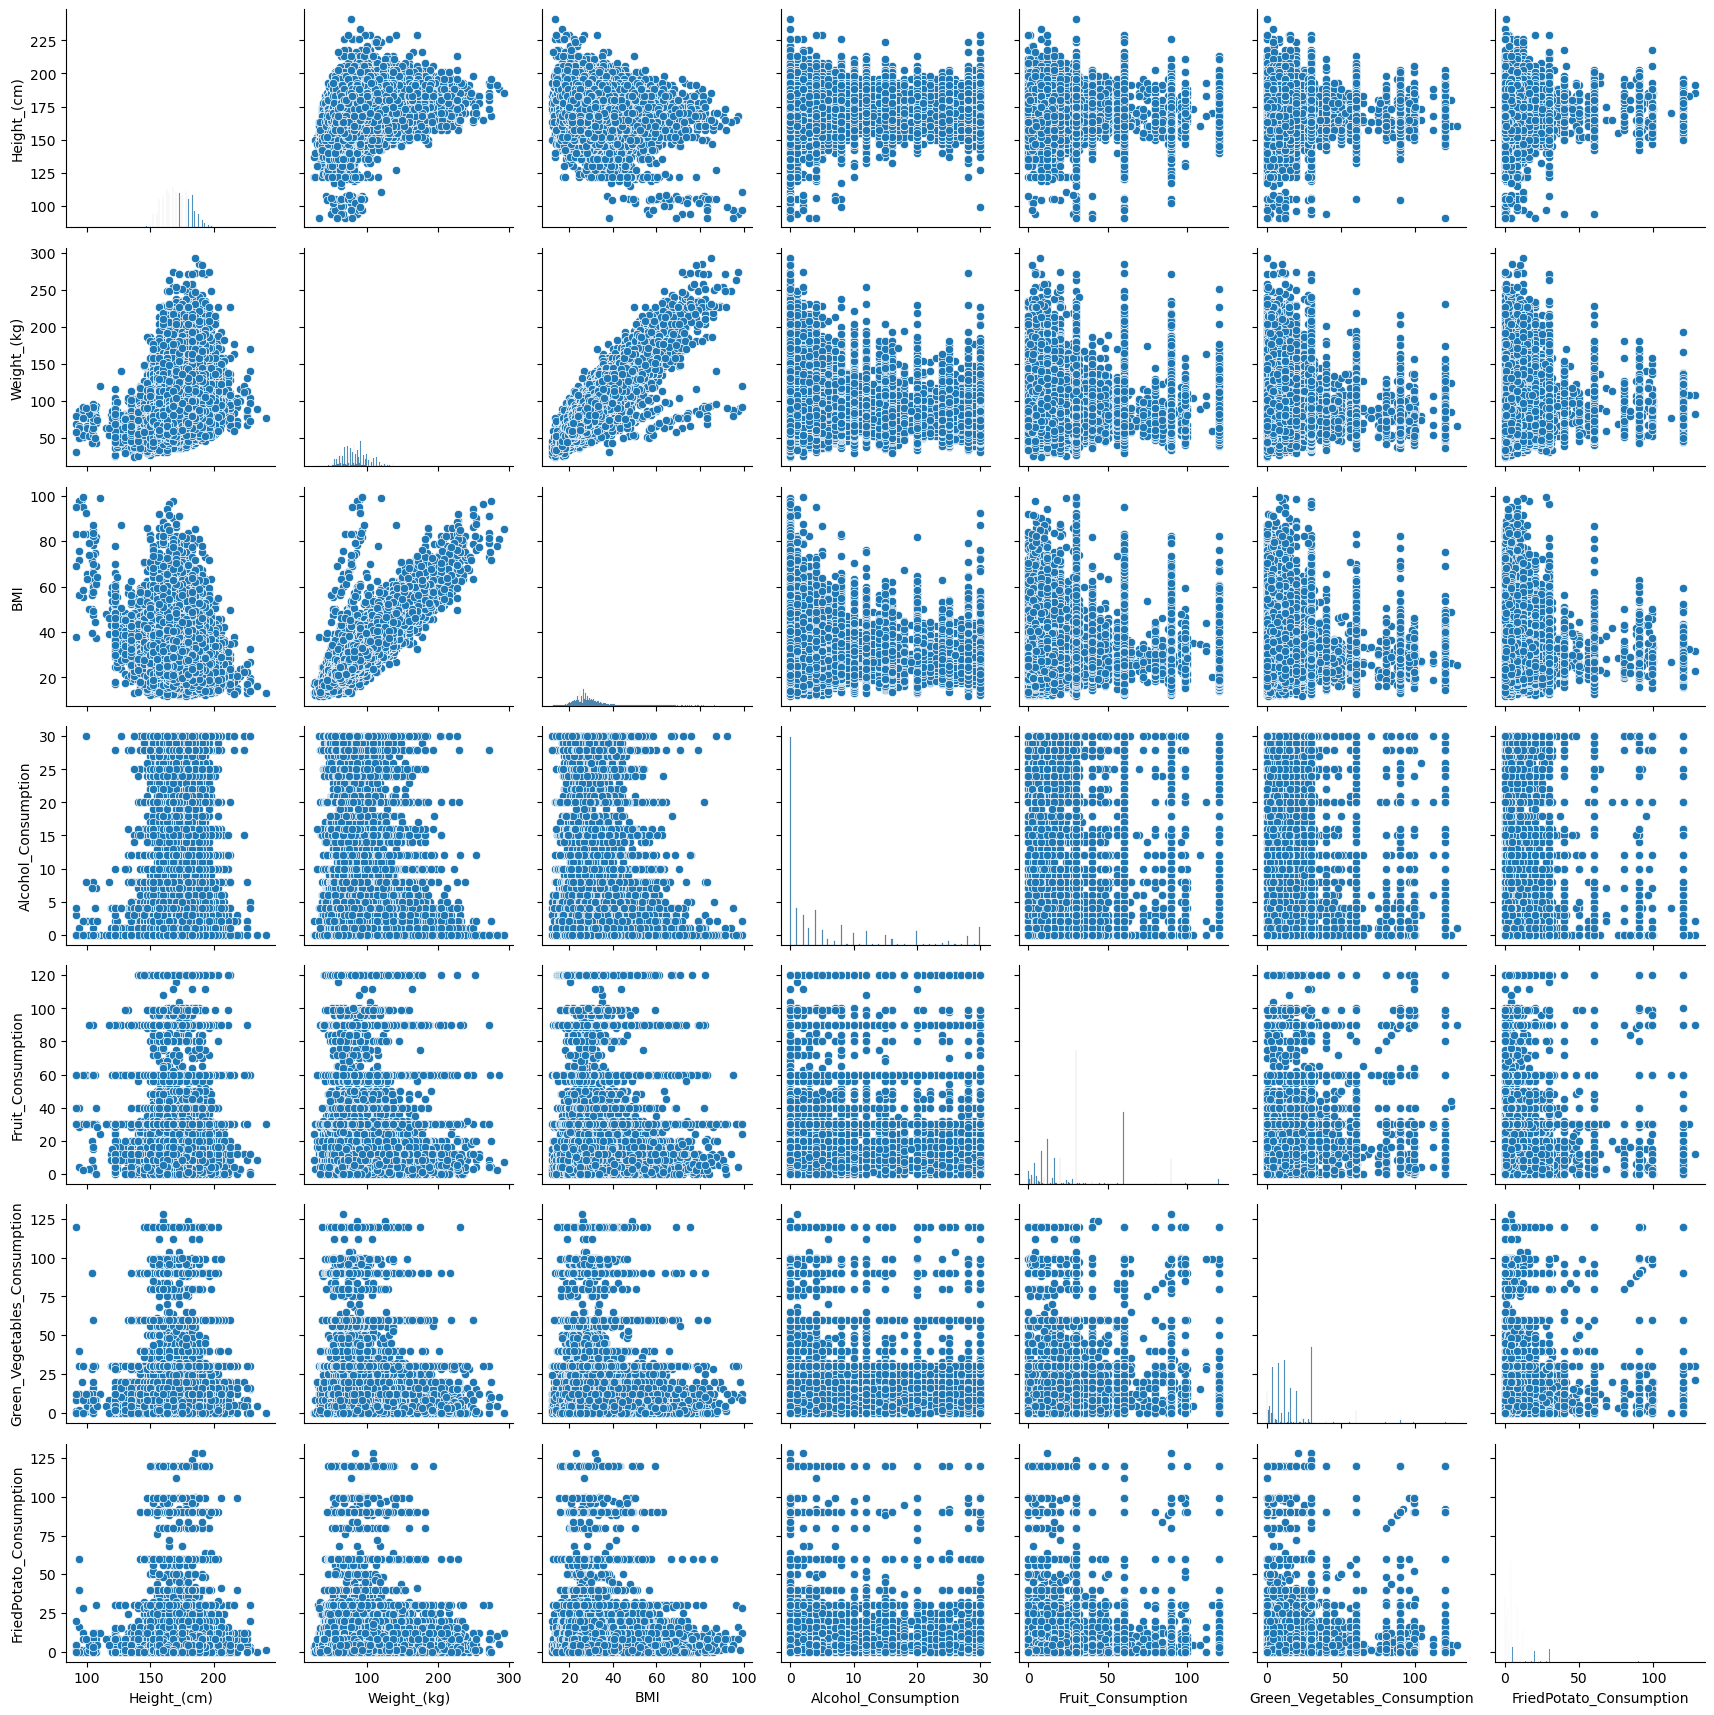

In [4]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

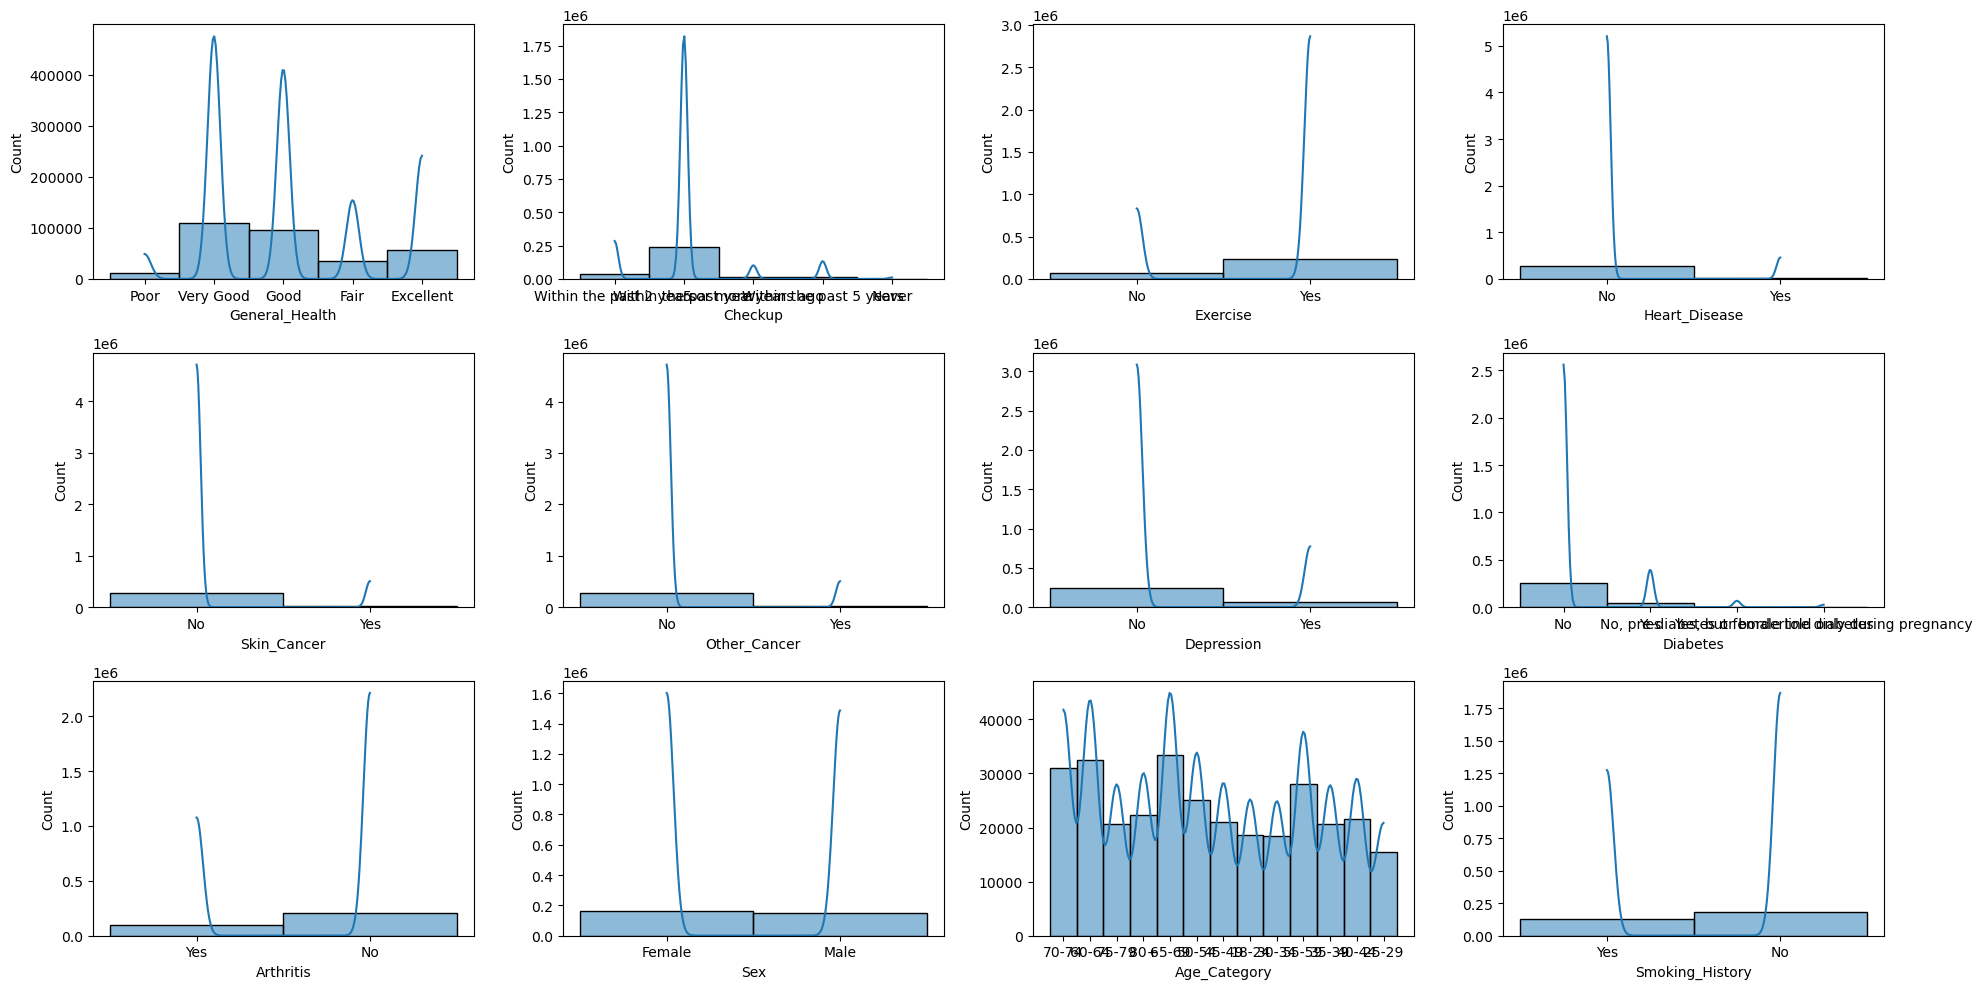

In [5]:
categorical_features = df.columns[df.dtypes =='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in categorical_features:
    ax = plt.subplot(3,4,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()

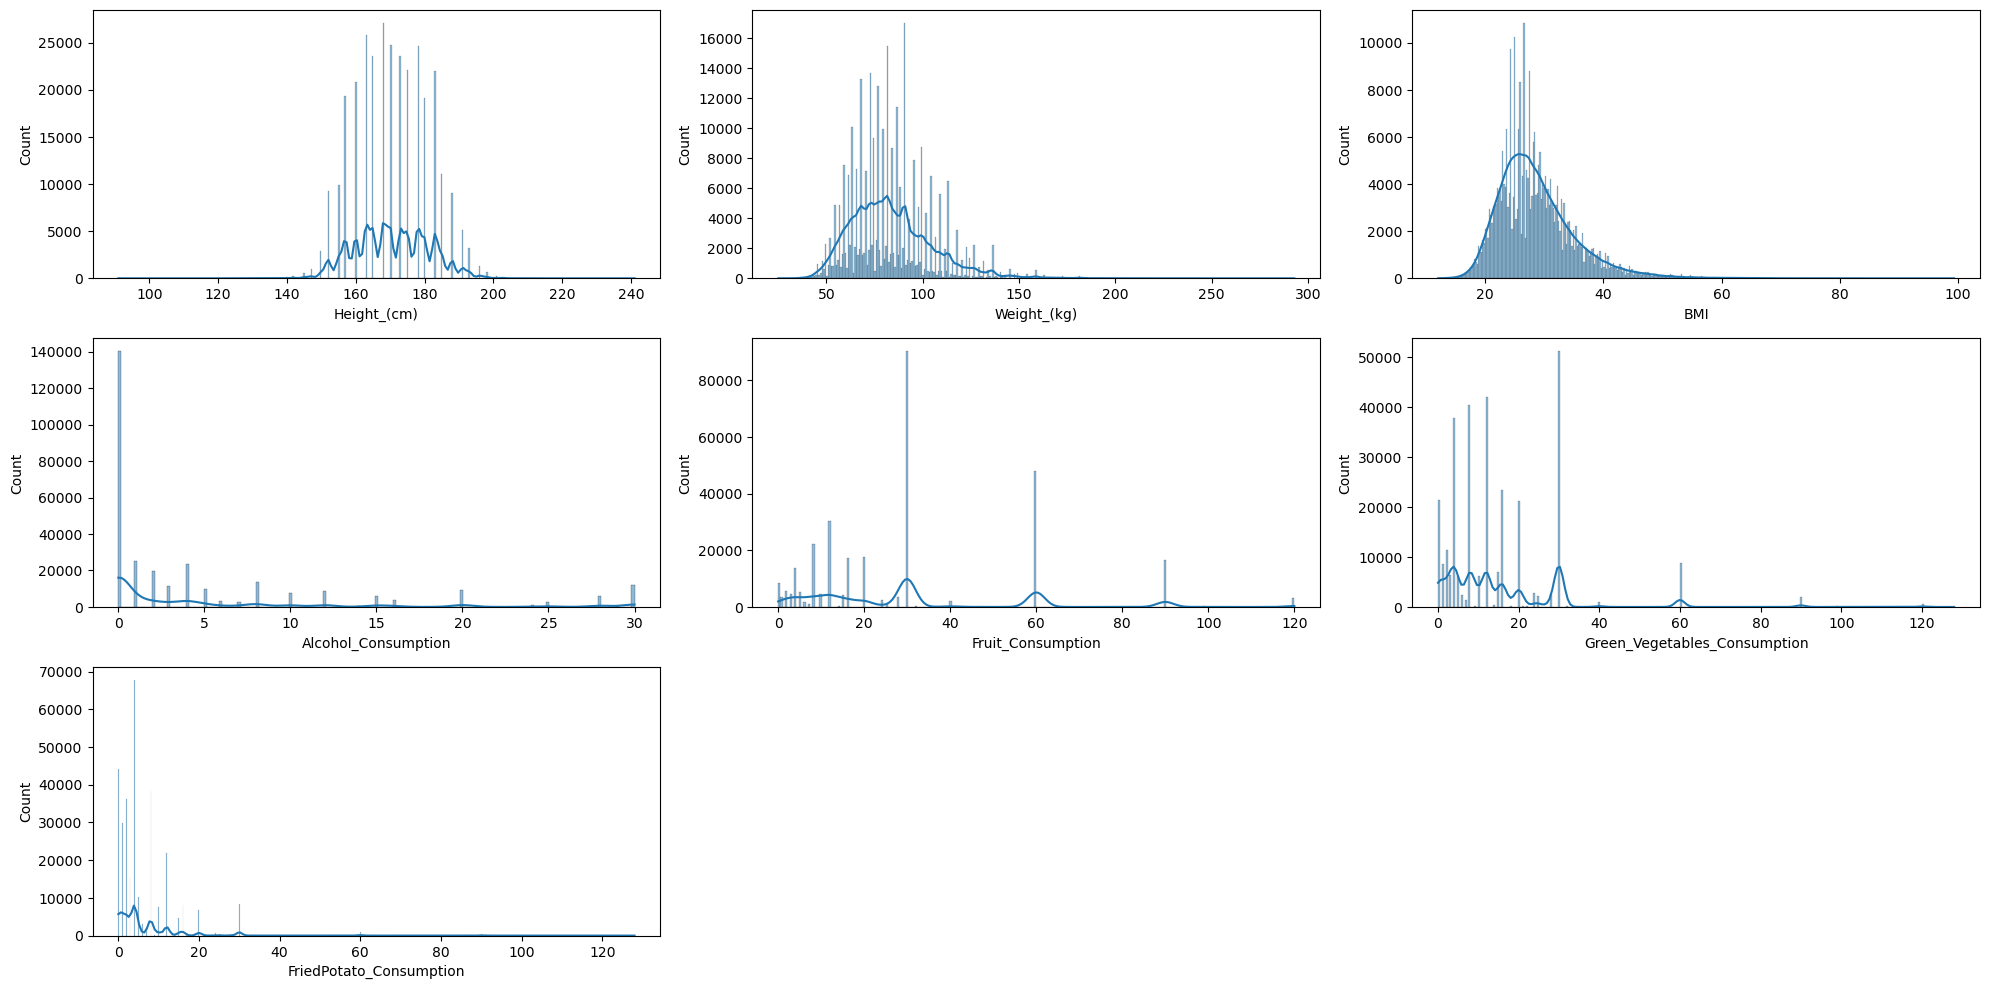

In [6]:
numerical_features = df.columns[df.dtypes !='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in numerical_features:
    ax = plt.subplot(3,3,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()

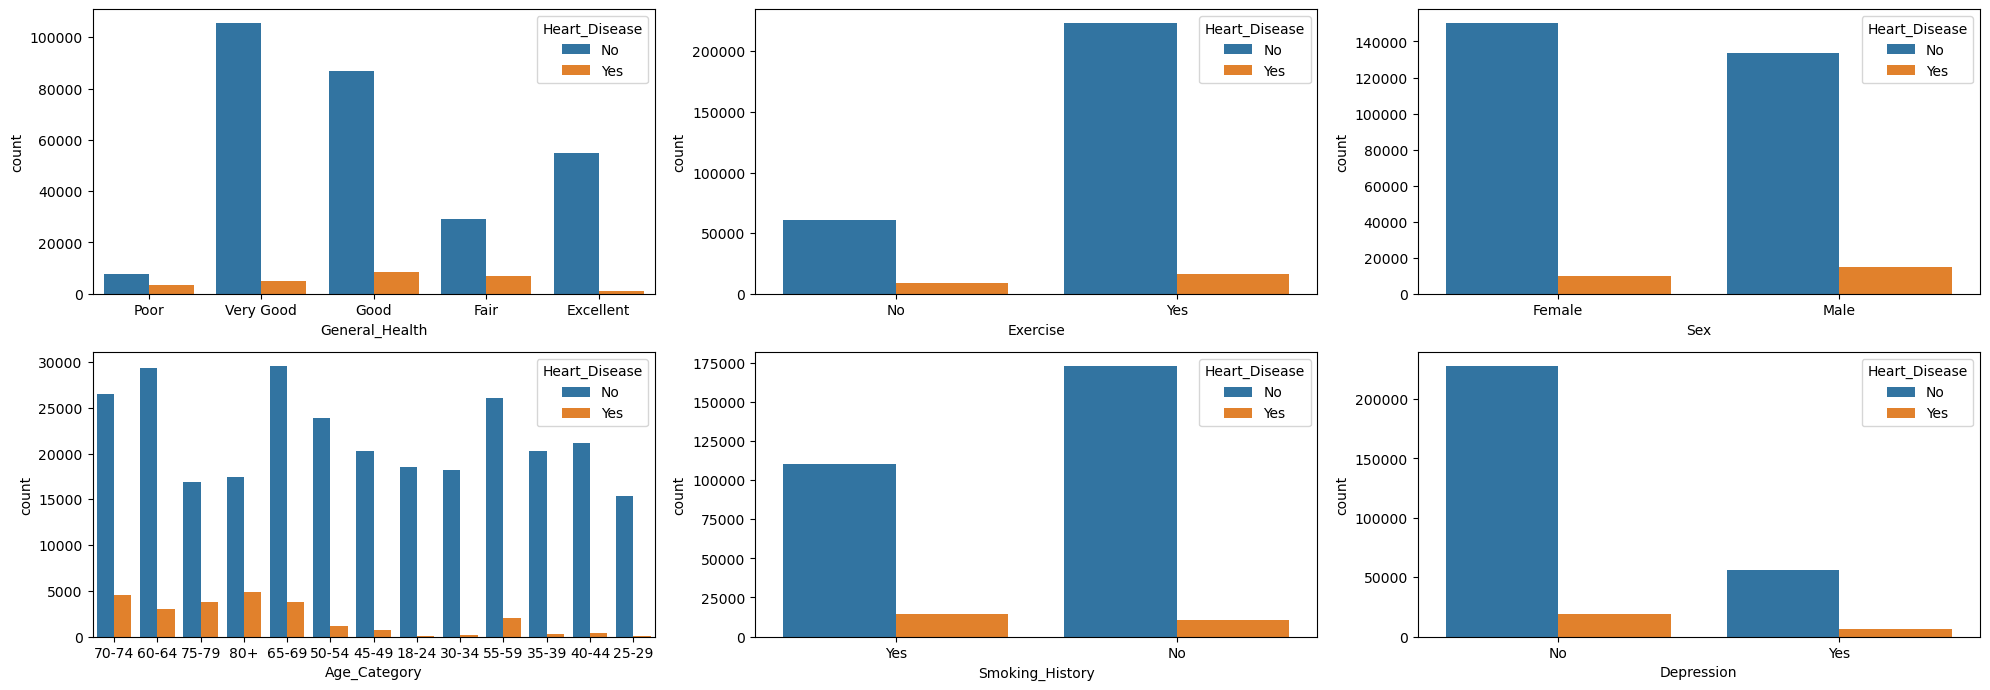

In [7]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History', 'Depression']
disease = 'Heart_Disease'
plot_num = 1
plt.figure(figsize=(20,10))
for variable in selected_variables:
    ax = plt.subplot(3,3, plot_num)
    sns.countplot(data=df, x = variable, hue = disease)
    plot_num += 1
plt.tight_layout()

In [8]:
data = df.copy()
categorical_features = df.columns[df.dtypes =='object']
le = LabelEncoder()
for i in categorical_features:
    data[i] = le.fit_transform(data[i])
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [9]:
X = data.drop('Heart_Disease', axis='columns')
y = data['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [10]:
classifier = RandomForestClassifier(n_estimators=500)

In [11]:
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)
prediction_probability = classifier.predict_proba(X_test)

In [ ]:
print("Report: \n", classification_report(y_test, predictions))
print('\n')
print("Roc Score: ", roc_auc_score(y_test, prediction_probability[:,1]))